# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# Start with loading all necessary libraries
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob


In [8]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [9]:
reviews_df = pd.DataFrame()
reviews_df["reviews"] = reviews
print(reviews_df.head())
print(reviews_df.shape)

                                             reviews
0  ✅ Trip Verified |  I had broken my leg 2 days ...
1  ✅ Trip Verified | Check in at MIA straightforw...
2  ✅ Trip Verified |   Never I saw such a terribl...
3  ✅ Trip Verified |  Having not flown with BA fo...
4  ✅ Trip Verified | Dear Community I feel compel...
(1000, 1)


In [13]:
reviews_df.to_csv("../outputs/datasets/messy_reviews_df.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [14]:
display(reviews_df.head())

,reviews
0,✅ Trip Verified | I had broken my leg 2 days ...
1,✅ Trip Verified | Check in at MIA straightforw...
2,✅ Trip Verified | Never I saw such a terribl...
3,✅ Trip Verified | Having not flown with BA fo...
4,✅ Trip Verified | Dear Community I feel compel...


In [15]:
# Remove unnecessary text from each row

def remove_trip_verified_text(row):
    cleaned_row = row.replace('✅ Trip Verified', "")
    return cleaned_row


In [16]:
def remove_not_verified_text(row):
    cleaned_row = row.replace('Not Verified', "")
    return cleaned_row

In [17]:
def remove_pipe_xter(row):
    cleaned_row = row.replace('|', "")
    return cleaned_row

In [18]:
# Apply the function to the 'reviews' column
reviews_df['reviews'] = reviews_df['reviews'].apply(remove_trip_verified_text)
reviews_df['reviews'] = reviews_df['reviews'].apply(remove_not_verified_text)
reviews_df['reviews'] = reviews_df['reviews'].apply(remove_pipe_xter)
reviews_df['reviews'] = reviews_df['reviews'].str.strip()
# Display the updated dataframe
reviews_df.head()

,reviews
0,I had broken my leg 2 days before our return f...
1,Check in at MIA straightforward. BA use Americ...
2,Never I saw such a terrible customer experienc...
3,"Having not flown with BA for a few years, I re..."
4,Dear Community I feel compelled to share the u...


In [20]:
reviews_df.to_csv("../outputs/datasets/cleaned_reviews.csv")

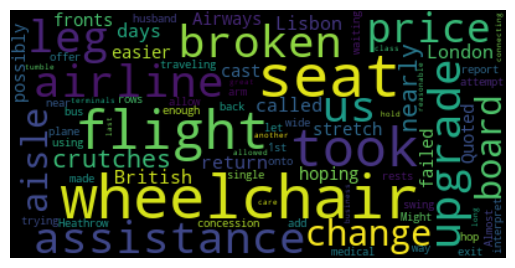

In [21]:
# Start with one review:
text = reviews_df.reviews[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=10000).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
text = " ".join(review for review in reviews_df.reviews)
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 801269 words in the combination of all reviews.


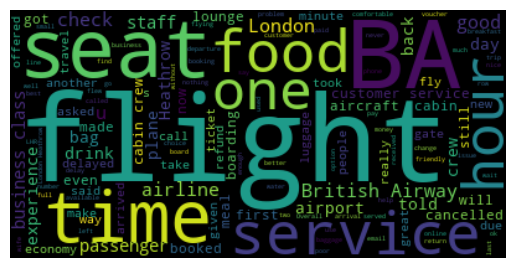

In [23]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=10000).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see from the wordcloud that the most frequent words in the reviews are: Flight, BA, time, hour, seat, food. This does not tell us entirely the context of the words in sentences. Therefore we will carry out a sentiment analysis to understand the feelings of BA passengers.

In [24]:
wordcloud.to_file("../outputs/images/wordcloud_reviews.png")

In [25]:
# Function to apply sentiment analysis using TextBlob
def analyze_sentiment(review):
    analysis = TextBlob(review)
    # Classify the polarity as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [26]:
# Apply sentiment analysis to the 'reviews' column
reviews_df['sentiment'] = reviews_df['reviews'].apply(analyze_sentiment)

# Display the DataFrame with sentiment analysis results
print(reviews_df.head())

                                             reviews sentiment
0  I had broken my leg 2 days before our return f...  Negative
1  Check in at MIA straightforward. BA use Americ...  Positive
2  Never I saw such a terrible customer experienc...  Negative
3  Having not flown with BA for a few years, I re...  Negative
4  Dear Community I feel compelled to share the u...  Negative


In [27]:
reviews_df.to_csv('../outputs/datasets/ba_reviews_sentiment')

sentiment
Positive    641
Negative    348
Neutral      11
Name: count, dtype: int64


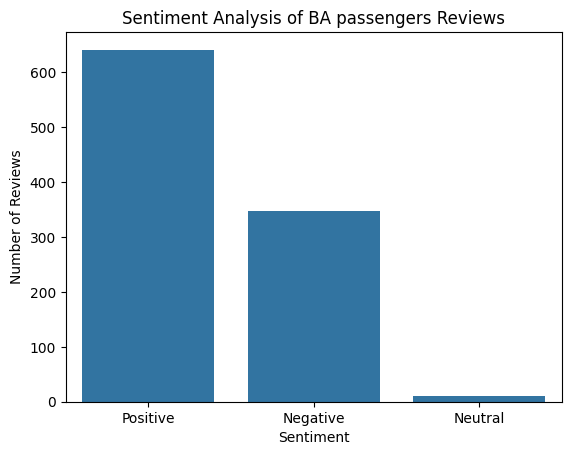

In [28]:
# Group by 'sentiment' and count occurrences
sentiment_counts = reviews_df['sentiment'].value_counts()
print(sentiment_counts)
# Plot a bar plot using Seaborn
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Analysis of BA passengers Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [29]:
# Save the plot as an image file (e.g., PNG)
plt.savefig('../outputs/images/sentiment_analysis_plot.png')

<Figure size 640x480 with 0 Axes>